In [1]:
import pandas as pd;
import numpy as np;
import mysql.connector as mc;
import matplotlib.pyplot as plt;

In [2]:
con = mc.connect(
    host="localhost",
    user="root",
    password="ami bangali",
    database="STUDENT"
)

# Collect data with the help of pandas
query = "SELECT * FROM STUDENT_INFORMATION"
data = pd.read_sql(query, con)
con.close()

C:\Users\RAJDEEP SADHU\AppData\Local\Temp\ipykernel_15660\4003699354.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, con)


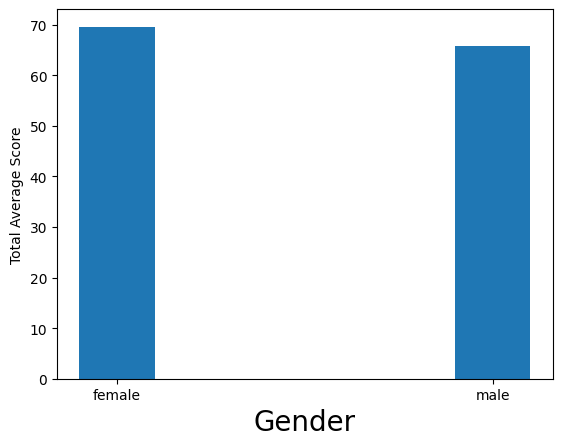

In [12]:
data["average_score"] = data[["MATH_SCORE", "PHYSICS_SCORE", "CHEMISTRY_SCORE"]].mean(axis=1)
avg_gender = data.groupby("GENDER")["average_score"].mean()
key = [i for i in avg_gender.keys()]
value = [avg_gender[i] for i in avg_gender.keys()]
plt.bar(key,value,width=0.2)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Total Average Score")
plt.show()

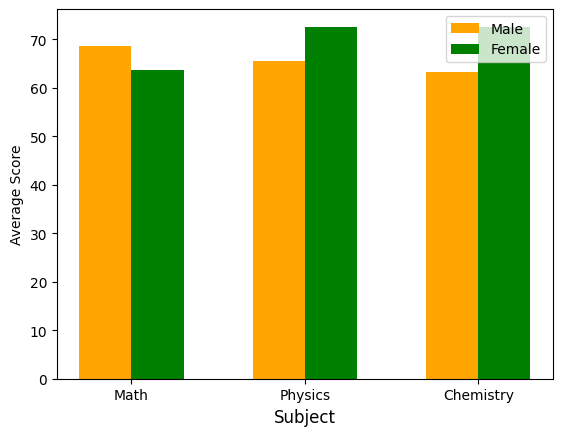

In [ ]:
AVG_MATH = data.groupby("GENDER")["MATH_SCORE"].mean()
AVG_PHYSIC = data.groupby("GENDER")["PHYSICS_SCORE"].mean()
AVG_CHEMISTRY = data.groupby("GENDER")["CHEMISTRY_SCORE"].mean()
plot1 = [AVG_MATH["male"], AVG_PHYSIC["male"], AVG_CHEMISTRY["male"]]
plot2 = [AVG_MATH["female"], AVG_PHYSIC["female"], AVG_CHEMISTRY["female"]]
x = ["Math", "Physics", "Chemistry"]
a = np.arange(3)
widths = 0.3
b = [i+widths for i in range(3)]
plt.bar(a, plot1, color="orange",width = widths,label="Male" )
plt.bar(b, plot2, color="g",width = widths, label="Female")
plt.xticks(a+widths/2,x)
plt.xlabel("Subject",fontsize=12)
plt.ylabel("Average Score", fontsize=10)
plt.legend()
plt.show()